In [79]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [103]:
import datetime
import numpy as np
epoch_0 = datetime.datetime(1970,1,1,0,0,0)

def convertDate(date):
    return (pd.Timestamp(date) - epoch_0) / (np.timedelta64(1,'s'))

K_LIST = [2, 5, 12, 24, 48]
SYMBOLS_LIST = ['BTC.X', 'BCH.X', 'LTC.X', 'ETH.X']

In [104]:
twoHdata = pd.read_csv("output/2h.csv") 
fiveH_data = pd.read_csv("output/5h.csv") 
twelveH_data = pd.read_csv("output/12h.csv") 
twoFourH_data = pd.read_csv("output/24h.csv") 
fourEight_data = pd.read_csv("output/48h.csv") 

hour_df_list = [twoHdata, fiveH_data, twelveH_data, twoFourH_data, fourEight_data]
hour_symbol_df_list = []

for k_index in range(len(K_LIST)):
    df = hour_df_list[k_index]
    df['created_at'] = df['created_at'].apply(convertDate)
    df['modified'] = df['modified'].apply(convertDate)
    df['Date'] = df['Date'].apply(convertDate)
    df = df.sort_values(by=['created_at'])
    df = df.fillna(method='ffill')
    df = df.fillna(0)
    hour_symbol_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        df_symbol = df[df.Symbol == symbol_index].reset_index()
        hour_symbol_list.append(df_symbol)
    
    hour_symbol_df_list.append(hour_symbol_list)

### See correlation of vars quickly

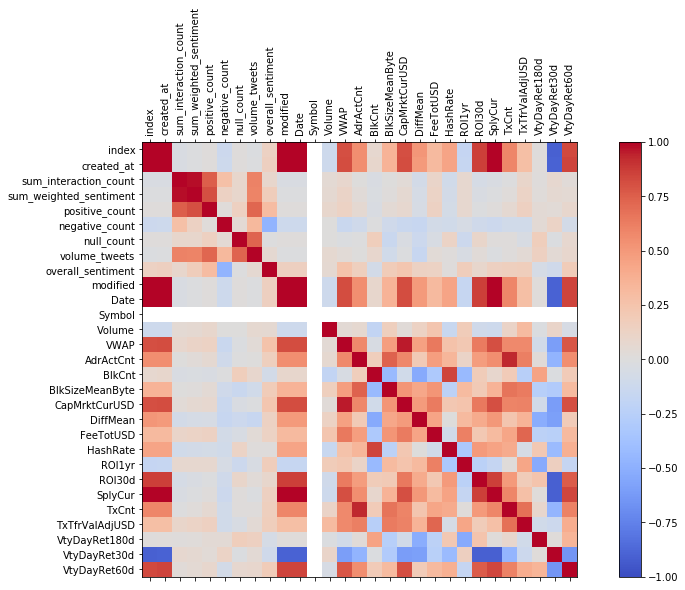

In [105]:
data = hour_symbol_df_list[0][0]
corr = data.corr()
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [106]:
from sklearn.model_selection import train_test_split

X_train_hour_symbol = []
y_train_hour_symbol = []
X_test_hour_symbol = []
y_test_hour_symbol = []

for k_index in range(len(K_LIST)):
    X_train_hour_symbol_list = []
    y_train_hour_symbol_list = []
    X_test_hour_symbol_list = []
    y_test_hour_symbol_list = []
    
    for symbol_index in range(len(SYMBOLS_LIST)):
        df = hour_symbol_df_list[k_index][symbol_index]
        X = df.drop('VWAP', axis = 1)
        y = df[['VWAP']]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
        
        X_train_hour_symbol_list.append(X_train)
        y_train_hour_symbol_list.append(y_train)
        X_test_hour_symbol_list.append(X_test)
        y_test_hour_symbol_list.append(y_test)
    
    X_train_hour_symbol.append(X_train_hour_symbol_list)
    y_train_hour_symbol.append(y_train_hour_symbol_list)
    X_test_hour_symbol.append(X_test_hour_symbol_list)
    y_test_hour_symbol.append(y_test_hour_symbol_list)

## 1. Linear regression

In [107]:
from sklearn.linear_model import LinearRegression

reg_model_hour_symbol = []

for k_index in range(len(K_LIST)):
    reg_model_hour_symbol_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        regression_model = LinearRegression()
        regression_model.fit(X_train_hour_symbol[k_index][symbol_index], y_train_hour_symbol[k_index][symbol_index])
        regression_model.score(X_test_hour_symbol[k_index][symbol_index], y_test_hour_symbol[k_index][symbol_index])
        reg_model_hour_symbol_list.append(regression_model)
        
    reg_model_hour_symbol.append(reg_model_hour_symbol_list)

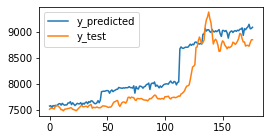

R2 for 2 h- BTC.X : 0.7216546518245078
RMSE for 2 h- BTC.X : 291.9372862085501 



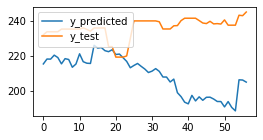

R2 for 2 h- BCH.X : -26.415966568271052
RMSE for 2 h- BCH.X : 30.47669357580211 



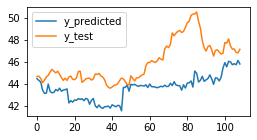

R2 for 2 h- LTC.X : -1.2649615184973815
RMSE for 2 h- LTC.X : 2.749572408797008 



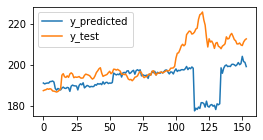

R2 for 2 h- ETH.X : -1.3064795543422139
RMSE for 2 h- ETH.X : 14.492454302788701 



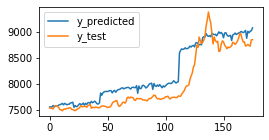

R2 for 5 h- BTC.X : 0.7414170885346608
RMSE for 5 h- BTC.X : 278.92335441539956 



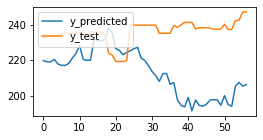

R2 for 5 h- BCH.X : -21.017201428583373
RMSE for 5 h- BCH.X : 28.537428536535867 



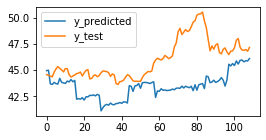

R2 for 5 h- LTC.X : -1.9061697114876819
RMSE for 5 h- LTC.X : 3.0734561578583577 



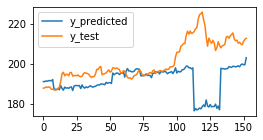

R2 for 5 h- ETH.X : -1.5948186689748547
RMSE for 5 h- ETH.X : 15.310112177021908 



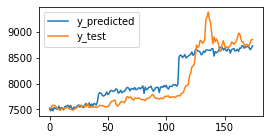

R2 for 12 h- BTC.X : 0.7974224690254162
RMSE for 12 h- BTC.X : 247.22815047395446 



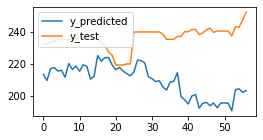

R2 for 12 h- BCH.X : -19.934937702869057
RMSE for 12 h- BCH.X : 30.35788654372992 



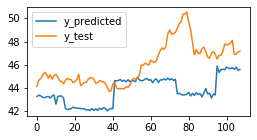

R2 for 12 h- LTC.X : -1.6125092978816218
RMSE for 12 h- LTC.X : 2.818972799554142 



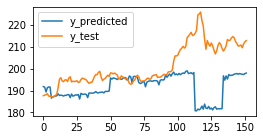

R2 for 12 h- ETH.X : -1.4657496239696999
RMSE for 12 h- ETH.X : 14.401111912647403 



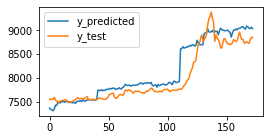

R2 for 24 h- BTC.X : 0.7938074284899352
RMSE for 24 h- BTC.X : 247.81271065892255 



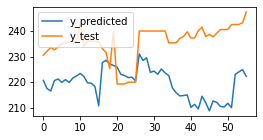

R2 for 24 h- BCH.X : -6.995943089678607
RMSE for 24 h- BCH.X : 18.742800271456826 



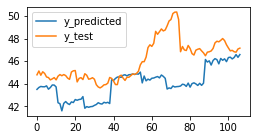

R2 for 24 h- LTC.X : -1.1839655133520721
RMSE for 24 h- LTC.X : 2.583564009386206 



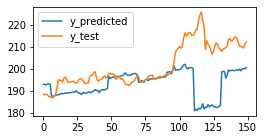

R2 for 24 h- ETH.X : -1.1347922521171925
RMSE for 24 h- ETH.X : 13.57222519302807 



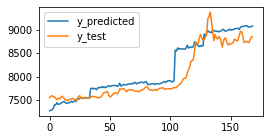

R2 for 48 h- BTC.X : 0.7803339600119537
RMSE for 48 h- BTC.X : 255.340229965571 



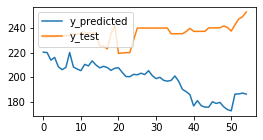

R2 for 48 h- BCH.X : -37.188663553828356
RMSE for 48 h- BCH.X : 41.8187440939741 



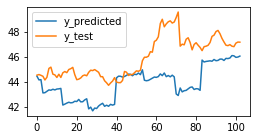

R2 for 48 h- LTC.X : -1.4805113098443057
RMSE for 48 h- LTC.X : 2.470015458749999 



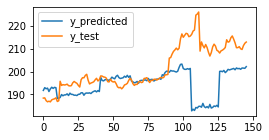

R2 for 48 h- ETH.X : -0.8254032602643053
RMSE for 48 h- ETH.X : 12.608269338881145 



In [157]:
from sklearn.metrics import mean_squared_error
import math

for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        regression_model = reg_model_hour_symbol[k_index][symbol_index]
        X_test = X_test_hour_symbol[k_index][symbol_index]
        X_train = X_train_hour_symbol[k_index][symbol_index]
        y_test = y_test_hour_symbol[k_index][symbol_index]
        y_train = y_train_hour_symbol[k_index][symbol_index]
        
        rSquared = regression_model.score(X_test, y_test)
        y_predict = regression_model.predict(X_test)
        regression_model_mse = mean_squared_error(y_predict, y_test)
        RMSE = math.sqrt(regression_model_mse)
        
        # plot
        plt.figure(figsize=(4,2))
        plt.plot(y_predict, label="y_predicted")
        plt.plot(y_test.reset_index()['VWAP'], label="y_test")
        plt.legend(loc="upper left")
        plt.show()
        print("R2 for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", rSquared)
        print("RMSE for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", RMSE, "\n")

### 2. Decision Tree regression

In [160]:
from sklearn.tree import DecisionTreeRegressor

dec_tree_model_hour_symbol = []

for k_index in range(len(K_LIST)):
    dec_tree_model_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        dec_tree_model = DecisionTreeRegressor()
        dec_tree_model.fit(X_train_hour_symbol[k_index][symbol_index], y_train_hour_symbol[k_index][symbol_index])
        dec_tree_model_list.append(dec_tree_model)
        
    dec_tree_model_hour_symbol.append(dec_tree_model_list)

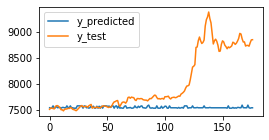

R2 for 2 h- BTC.X : -0.6846961645024847
RMSE for 2 h- BTC.X : 718.221458225276 



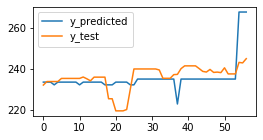

R2 for 2 h- BCH.X : -0.8256982456889403
RMSE for 2 h- BCH.X : 7.8646711278551225 



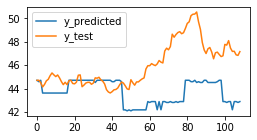

R2 for 2 h- LTC.X : -1.8902952266102895
RMSE for 2 h- LTC.X : 3.1060314586330806 



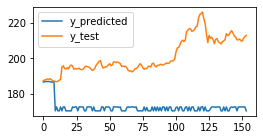

R2 for 2 h- ETH.X : -9.14788871462713
RMSE for 2 h- ETH.X : 30.398698013090208 



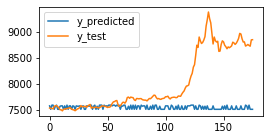

R2 for 5 h- BTC.X : -0.7156184959649667
RMSE for 5 h- BTC.X : 718.4479813478347 



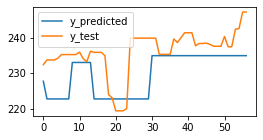

R2 for 5 h- BCH.X : -1.0445483604901664
RMSE for 5 h- BCH.X : 8.696259141187221 



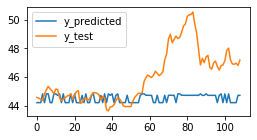

R2 for 5 h- LTC.X : -0.5912635599484986
RMSE for 5 h- LTC.X : 2.2742468144167676 



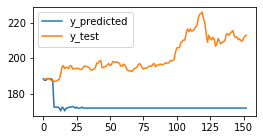

R2 for 5 h- ETH.X : -9.143706633443335
RMSE for 5 h- ETH.X : 30.270751723616872 



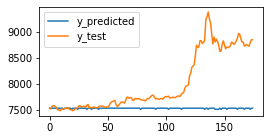

R2 for 12 h- BTC.X : -0.7490383916410267
RMSE for 12 h- BTC.X : 726.4436875144362 



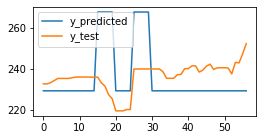

R2 for 12 h- BCH.X : -5.235474908476424
RMSE for 12 h- BCH.X : 16.568014466512704 



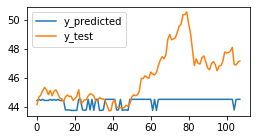

R2 for 12 h- LTC.X : -0.8196821787004911
RMSE for 12 h- LTC.X : 2.3526630618323323 



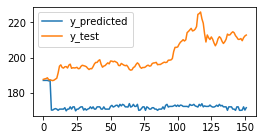

R2 for 12 h- ETH.X : -10.096406934262097
RMSE for 12 h- ETH.X : 30.55010625657481 



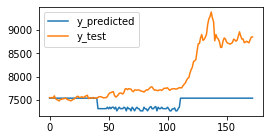

R2 for 24 h- BTC.X : -0.860820804720809
RMSE for 24 h- BTC.X : 744.45653605755 



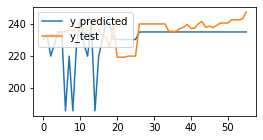

R2 for 24 h- BCH.X : -3.269030148585254
RMSE for 24 h- BCH.X : 13.695069513085867 



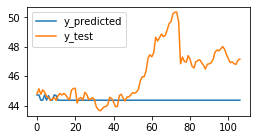

R2 for 24 h- LTC.X : -0.9299972211530934
RMSE for 24 h- LTC.X : 2.4287045121785877 



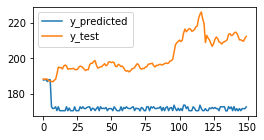

R2 for 24 h- ETH.X : -9.919101136791285
RMSE for 24 h- ETH.X : 30.694933177908975 



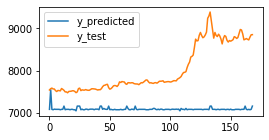

R2 for 48 h- BTC.X : -2.8696100118997037
RMSE for 48 h- BTC.X : 1071.6954423128545 



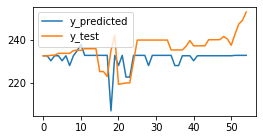

R2 for 48 h- BCH.X : -0.4639584072079909
RMSE for 48 h- BCH.X : 8.187816950453973 



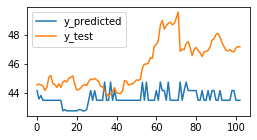

R2 for 48 h- LTC.X : -2.0366806280171574
RMSE for 48 h- LTC.X : 2.7329307363935365 



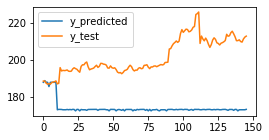

R2 for 48 h- ETH.X : -9.17392672432259
RMSE for 48 h- ETH.X : 29.76599259912156 



In [161]:
from sklearn.metrics import mean_squared_error
import math

for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        dec_tree_model = dec_tree_model_hour_symbol[k_index][symbol_index]
        X_test = X_test_hour_symbol[k_index][symbol_index]
        X_train = X_train_hour_symbol[k_index][symbol_index]
        y_test = y_test_hour_symbol[k_index][symbol_index]
        y_train = y_train_hour_symbol[k_index][symbol_index]
        
        rSquared = dec_tree_model.score(X_test, y_test)
        y_predict = dec_tree_model.predict(X_test)
        regression_model_mse = mean_squared_error(y_predict, y_test)
        RMSE = math.sqrt(regression_model_mse)
        
        # plot
        plt.figure(figsize=(4,2))
        plt.plot(y_predict, label="y_predicted")
        plt.plot(y_test.reset_index()['VWAP'], label="y_test")
        plt.legend(loc="upper left")
        plt.show()
        print("R2 for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", rSquared)
        print("RMSE for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", RMSE, "\n")

### 3. Gradient Boosted Tree regression

In [185]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 7, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}

gb_tree_model_hour_symbol = []

for k_index in range(len(K_LIST)):
    gb_tree_model_list = []
    for symbol_index in range(len(SYMBOLS_LIST)):
        gb_tree_model = GradientBoostingRegressor(**params)
        gb_tree_model.fit(X_train_hour_symbol[k_index][symbol_index], y_train_hour_symbol[k_index][symbol_index].values.ravel())
        gb_tree_model_list.append(gb_tree_model)
        
    gb_tree_model_hour_symbol.append(gb_tree_model_list)

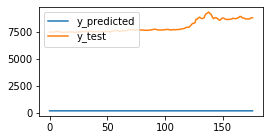

R2 for 2 h- BTC.X : -199.49185813625496
RMSE for 2 h- BTC.X : 7835.125427843354 



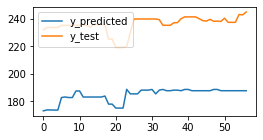

R2 for 2 h- BCH.X : -77.34031700037212
RMSE for 2 h- BCH.X : 51.517968577051285 



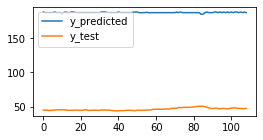

R2 for 2 h- LTC.X : -6035.842111721634
RMSE for 2 h- LTC.X : 141.95139209456207 



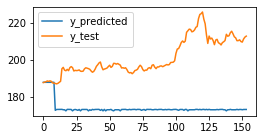

R2 for 2 h- ETH.X : -8.526642112325726
RMSE for 2 h- ETH.X : 29.453510188564117 



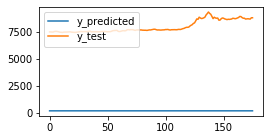

R2 for 5 h- BTC.X : -202.88195852012473
RMSE for 5 h- BTC.X : 7832.030452726047 



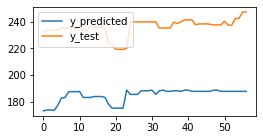

R2 for 5 h- BCH.X : -70.57217113336954
RMSE for 5 h- BCH.X : 51.45242815988142 



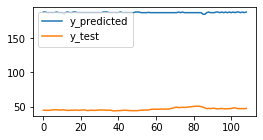

R2 for 5 h- LTC.X : -6199.797901532168
RMSE for 5 h- LTC.X : 141.9679544240841 



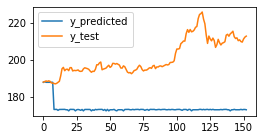

R2 for 5 h- ETH.X : -8.611762853843985
RMSE for 5 h- ETH.X : 29.466353143140772 



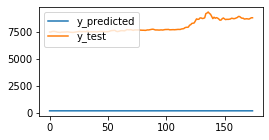

R2 for 12 h- BTC.X : -202.53072304123083
RMSE for 12 h- BTC.X : 7836.412176911955 



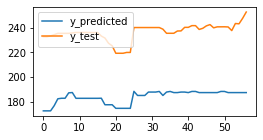

R2 for 12 h- BCH.X : -60.617115149251205
RMSE for 12 h- BCH.X : 52.08184703937773 



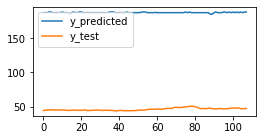

R2 for 12 h- LTC.X : -6619.911377005347
RMSE for 12 h- LTC.X : 141.91256518507234 



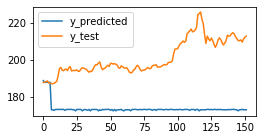

R2 for 12 h- ETH.X : -9.374147715479229
RMSE for 12 h- ETH.X : 29.53913348330389 



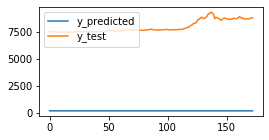

R2 for 24 h- BTC.X : -204.93504327878819
RMSE for 24 h- BTC.X : 7831.630668279961 



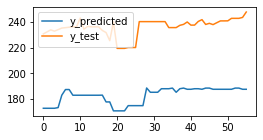

R2 for 24 h- BCH.X : -62.77691804481078
RMSE for 24 h- BCH.X : 52.93359549983057 



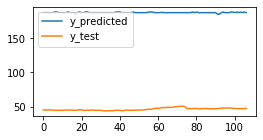

R2 for 24 h- LTC.X : -6584.758617818902
RMSE for 24 h- LTC.X : 141.87283338357815 



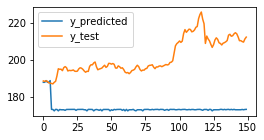

R2 for 24 h- ETH.X : -9.218602385483985
RMSE for 24 h- ETH.X : 29.694020110365916 



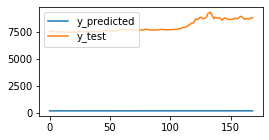

R2 for 48 h- BTC.X : -206.64703617146336
RMSE for 48 h- BTC.X : 7850.560287352066 



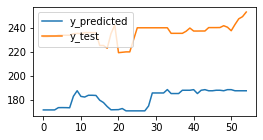

R2 for 48 h- BCH.X : -65.14144971160177
RMSE for 48 h- BCH.X : 55.035207809054924 



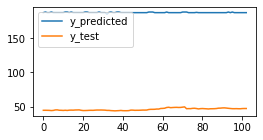

R2 for 48 h- LTC.X : -8203.590477088253
RMSE for 48 h- LTC.X : 142.05532558913885 



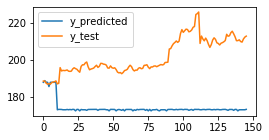

R2 for 48 h- ETH.X : -9.17392672432259
RMSE for 48 h- ETH.X : 29.76599259912156 



In [186]:
from sklearn.metrics import mean_squared_error
import math

for k_index in range(len(K_LIST)):
    for symbol_index in range(len(SYMBOLS_LIST)):
        gb_tree_model = gb_tree_model_hour_symbol[k_index][symbol_index]
        X_test = X_test_hour_symbol[k_index][symbol_index]
        X_train = X_train_hour_symbol[k_index][symbol_index]
        y_test = y_test_hour_symbol[k_index][symbol_index]
        y_train = y_train_hour_symbol[k_index][symbol_index]
        
        rSquared = dec_tree_model.score(X_test, y_test)
        y_predict = dec_tree_model.predict(X_test)
        regression_model_mse = mean_squared_error(y_predict, y_test)
        RMSE = math.sqrt(regression_model_mse)
        
        # plot
        plt.figure(figsize=(4,2))
        plt.plot(y_predict, label="y_predicted")
        plt.plot(y_test.reset_index()['VWAP'], label="y_test")
        plt.legend(loc="upper left")
        plt.show()
        print("R2 for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", rSquared)
        print("RMSE for", K_LIST[k_index], "h-", SYMBOLS_LIST[symbol_index], ":", RMSE, "\n")